<a href="https://colab.research.google.com/github/Chandradithya8/Machine-Learning/blob/master/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T-Test: One Sample

In [1]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

32

In [2]:
import numpy as np
pop_mean=np.mean(ages)
pop_mean

30.34375

In [3]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([30, 50, 28, 24, 18, 16, 70, 40, 27, 18])

In [4]:
from scipy.stats import ttest_1samp
pvalue=ttest_1samp(age_sample,30)
print(pvalue)

Ttest_1sampResult(statistic=0.39154610826793385, pvalue=0.7045026029020472)


In [5]:
ttest,pvalue=ttest_1samp(age_sample,30)
print(pvalue)

0.7045026029020472


In [6]:
if pvalue<0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis")  


accept null hypothesis


T-Test: Two Sample

In [7]:
import scipy.stats as stats
np.random.seed(6)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)
classB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)

In [8]:
_,p_value=stats.ttest_ind(classA_ages,classB_ages)
p_value

0.003180905180078275

In [9]:
if p_value<0.05:
  print(" reject null hypothesis")
else:
  print("accept null hypothesis")  

 reject null hypothesis


Correlation

In [10]:
import seaborn as sns
df=sns.load_dataset("iris")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


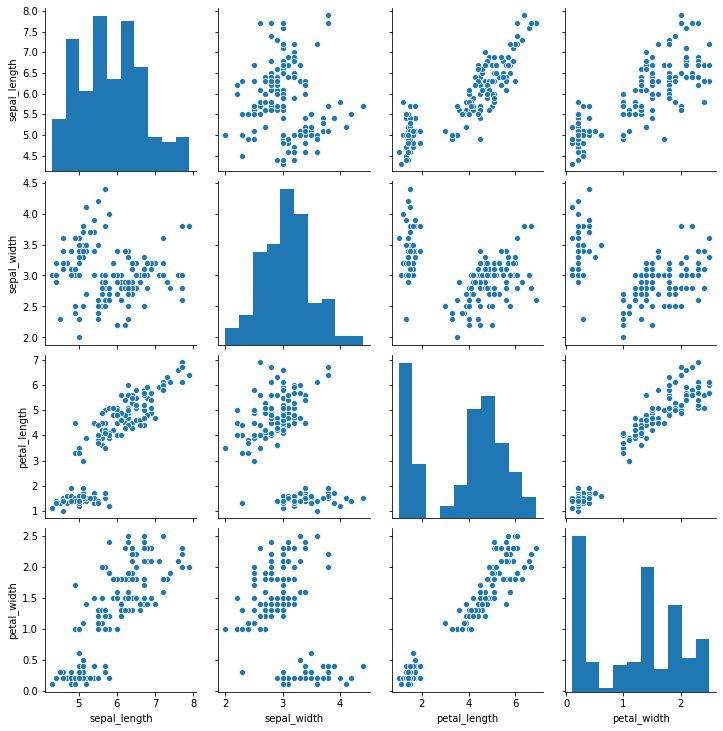

In [12]:
sns.pairplot(df)

Chi-Square Test

In [14]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [15]:
data_table=pd.crosstab(df['sex'],df['smoker'])
data_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [18]:
observed_value=data_table.values
observed_value

array([[60, 97],
       [33, 54]])

In [16]:
import scipy.stats as stats
a=stats.chi2_contingency(data_table)
a

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [19]:
expected_value=a[3]
expected_value

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [20]:
rows=len(data_table.iloc[0:2,0])
columns=len(data_table.iloc[0,0:2])
print(rows)
print(columns)

2
2


In [23]:
alpha=0.05
ddof=(rows-1)*(columns-1)
ddof # degree of freedom

1

In [26]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed_value,expected_value)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

0.001934818536627623

In [27]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [28]:
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [29]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
